<a href="https://colab.research.google.com/github/AnIsAsPe/LSM-Opciones-americanas/blob/main/Montecarlo_obtener_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
puntos = 20000
puntos_circulo = 0
puntos_cuadrado = 0

# Generar coordenadas aleatoreas x, y de puntos
for i in range(puntos):  
    x= random.uniform(-1, 1) 
    y= random.uniform(-1, 1) 
  
    # Distancia (x, y) al origen
    distancia_origen = np.sqrt(x**2 + y**2)
  
    # ¿El punto (x, y) está al interior del círculo?
    if distancia_origen <= 1: 
        puntos_circulo += 1  # puntos_circulo = puntos_circulo +1
    puntos_cuadrado += 1
  
# Estimación del valor de pi 
pi = 4* puntos_circulo/ puntos_cuadrado
pi

3.1592

## Visualización

In [32]:
def MonteCarloPi(numPuntos, decimales = 4):
    df = pd.DataFrame()
    # Generar coordenadas aleatoreas x, y de puntos,     
    df['x'] = np.random.uniform(-1, 1, numPuntos)
    df['y'] = np.random.uniform(-1, 1, numPuntos)

    # Distancia (x, y) al origen
    df['distancia_origen'] = np.sqrt(df['x']**2 + df['y']**2)

    # ¿El punto (x, y) está al interior del círculo?   
    df.loc[df['distancia_origen'] <= 1, 'dentro_circulo'] = True
    df.loc[df['distancia_origen'] > 1, 'dentro_circulo'] =  False
    df['estimacion_pi'] = 4*(df['dentro_circulo'] == True).cumsum()/(df.index-1)
    
    # Estimación del valor de pi
    pi_est = np.round(np.array(df['estimacion_pi'])[-1], decimales)
    piError = np.round(round(100*((pi_est - np.pi) / np.pi), 4), decimales)

    
    print('El valor de pi es aproximadamente {}.'.format(pi_est))
    print('El error respecto al verdadero valor de pi es de {}%.'.format(piError))

    #Grafica distinguiendo los puntos fuera y dentro del círculo
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='x', y='y', data=df, hue='dentro_circulo', palette='colorblind')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Puntos aleatorios')
    plt.show()
    
    #Gráfica estimación de  pi vs pi
    plt.figure(figsize=(16, 6))
    plt.plot(df.index+1, df['estimacion_pi'], color='g')
    plt.axhline(y=np.pi, color='black', ls='--')
    plt.xlim(0, numPuntos+1)
    plt.ylim(2.2, 4)
    plt.xlabel('Puntos')
    plt.ylabel('Estimación de pi')
    plt.title('Estimación de pi según cantidad de puntos')
    plt.show()


    return df, pi_est, piError

El valor de pi es aproximadamente 3.134703.
El error respecto al verdadero valor de pi es de -0.2193%.


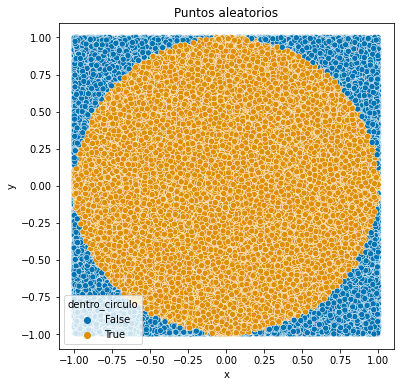

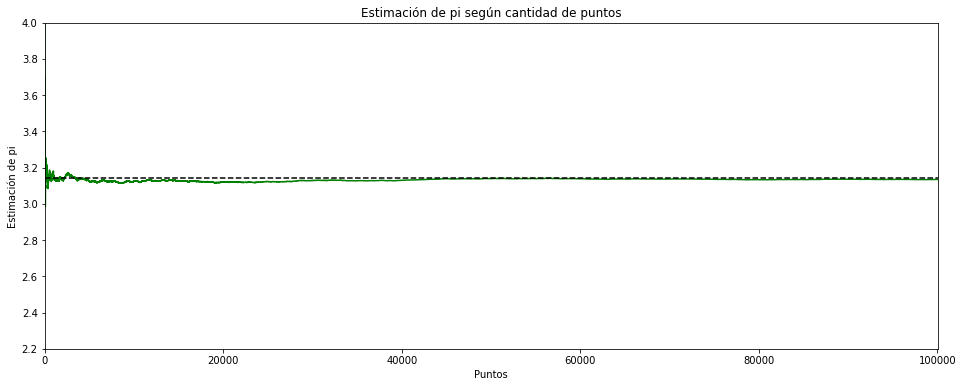

In [33]:
resultados = MonteCarloPi(100000,6)

In [11]:
len(resultados)

3

In [16]:
est_pi_df = resultados[0]
est_pi_df


,x,y,distancia_origen,dentro_circulo,estimacion_pi
0,0.577526,-0.573075,0.813604,True,-4.000000
1,-0.641010,-0.038575,0.642170,True,inf
2,0.646487,-0.602179,0.883496,True,12.000000
3,0.209340,0.404951,0.455860,True,8.000000
4,0.029100,0.419698,0.420706,True,6.666667
...,...,...,...,...,...
99995,-0.172723,0.856369,0.873614,True,3.141909
99996,0.450236,0.887800,0.995440,True,3.141917
99997,-0.478598,0.322383,0.577050,True,3.141926
99998,0.949616,0.796281,1.239288,False,3.141894


In [12]:
pi = resultados[1]
pi

3.141903

In [13]:
error = resultados[2]
error

0.0099

In [17]:
est_pi_df.describe()

,x,y,distancia_origen,estimacion_pi
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,0.001151,0.002283,0.765710,inf
std,0.577298,0.577646,0.283964,NaN
min,-0.999980,-0.999987,0.003342,-4.000000e+00
25%,-0.499254,-0.498198,0.565578,3.142297e+00
50%,0.003003,0.003533,0.797312,3.143610e+00
75%,0.499682,0.500996,0.977605,3.146694e+00
max,0.999966,0.999993,1.410406,inf
